**Statistical Data Analysis** by Me ❤

*Problem 1. Fisher distribution visualization*


1.1. In numpy.random find functionality to generate Fisher distribution. Generate sequence of 10 000 random variables of F(2,5) distribution. Use seed = 10.

In [66]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [67]:
np.random.seed(10)
x = sorted(np.random.f(2,5,10000))

1.2. Construct histogram for generated sample and attach scatterplot of F(2,5) pdf (find pdf in corresponding package of scipy.stats).

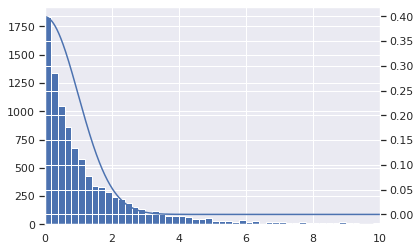

In [68]:
import seaborn as sns
sns.set()
plt.subplots(1, 1)
plt.hist(x, range=(0,10), bins=50)
plt.twinx()
plt.plot(x, norm.pdf(x))
plt.xlim(0, 10)
plt.show()

1.3. Construct scatterplot of F(2,5) cdf and output it.

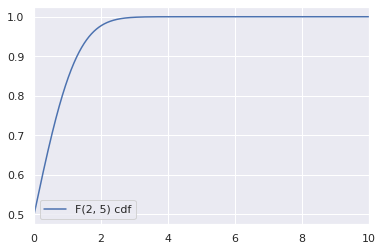

In [69]:
plt.plot(x, norm.cdf(x))
plt.xlim(0, 10)
plt.legend(['F(2, 5) cdf'])
plt.show()

1.4. Construct pdfs of F(2,5), F(5,2) and F(10,10) on the same plot. Name corresponding graphs appropriately.

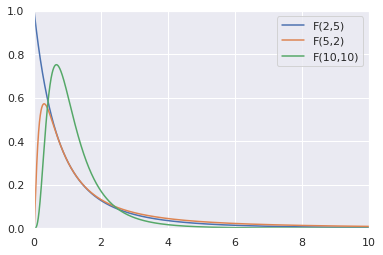

In [70]:
from scipy.stats import f
x_lin = np.linspace(0, 10, 10000)
plt.plot(x_lin, f.pdf(x_lin, 2, 5))
plt.plot(x_lin, f.pdf(x_lin, 5, 2))
plt.plot(x_lin, f.pdf(x_lin, 10, 10))
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.legend(['F(2,5)', 'F(5,2)', 'F(10,10)'])
plt.show()

*Problem 2. Normality/lognormality check*

2.1. Download and read file task_2_hw2.csv.

In [71]:
import pandas as pd

data = pd.read_csv('task_2_hw2.csv', header = None)

2.2. Plot QQ plots for normality check and for lognormality check.

In [72]:
from scipy.stats import norm
import plotly.graph_objects as go
import statistics as stat
import math
p_ = np.linspace(0,1,9999)
theor_q_ = [norm.ppf(pi,0,1) for pi in p_]

actual_q = data[0]
qq_plot = go.Scatter(x=theor_q_, y=actual_q, mode='markers', name = 'QQ plot normal')

y_log = [math.log(yi) for yi in data[0]]
qq_plot_log = go.Scatter(x=theor_q_, y=y_log, mode='markers', name = 'QQ plot log-normal')

In [73]:
plot = go.Figure()
plot.add_trace(qq_plot)

In [74]:
plot = go.Figure()
plot.add_trace(qq_plot_log)


*2.3. Output table containing skewness/kurtosis in the following format (pandas DataFrame):*

In [75]:
import scipy.stats as stats
y_ = data[0]

mean = stat.mean(y_)
mean_log = stat.mean(y_log)
stddev = stat.stdev(y_) 
stddev_log = stat.stdev(y_log)
skew_ = stats.skew(y_)
skew_log = stats.skew(y_log)
kurt = stats.kurtosis(y_, fisher = False)
kurt_log = stats.kurtosis(y_log, fisher = False)

row_ = [mean, stddev, skew_, kurt]
row_log = [mean_log, stddev_log, skew_log, kurt_log]

table = pd.DataFrame(data = [row_, row_log], columns = ["Mean", "Stddev", "Skewness", "Kurtosis"], index = ["Normal", "LogNormal"])
table

,Mean,Stddev,Skewness,Kurtosis
Normal,4.546303e+07,2.802437e+09,74.277767,5790.943093
LogNormal,-1.931591e+00,6.991851e+00,0.024905,3.028670


*2.4. In a separate cell of markdown type make conclusion about your choice (Normal or Lognormal) and explain why.*

Looking at the data in the table above, I could say that lognormal looks more adequate and real. However, both plots look like they were constructed wrong

*Problem 3. **Maximisation** (follow Lesson 5 notebook).*

*3.1. Define function $f(x) = arctg(x \cdot ln(x) \cdot sin^2 x)$ Using scipy.optimize find its maximum (x point and value) on segments [0, 3] and [0,6]. Are these maximums the same? Please also explain what input has helped you to find maximum on different segments and how did you choose this input.*

In [76]:
def func(x):
  return -np.arctan(x*np.log(x)*np.sin(x)*np.sin(x))

In [77]:
#import matplotlib.pyplot as plt

#x = np.linspace(-1, 10, 1000)
#y = func(x)
#plt.plot(x, -y)
#plt.show()

In [78]:
from scipy import optimize

res03 = optimize.fmin(func, x0 = 2, disp = False)
res06 = optimize.fmin(func, x0 = 5, disp = False)
print("Maximum in [0, 3] is at x =", res03[0], "and the value of the function is ", -func(res03[0]))
print("Maximum in [0, 6] is at x =", res06[0], "and the value of the function is ", -func(res06[0]))

Maximum in [0, 3] is at x = 2.0857421875 and the value of the function is  0.8599304259327581
Maximum in [0, 6] is at x = 4.8780517578125 and the value of the function is  1.4385975705527312


1. I have used fmin function from scipy.optimize to find the minimum of the given function multiplied by -1 = maximum of the given function. 
2. I've looked at the functions plot and understood that the maximum are about at 2 and 5 correspondingly, therefor the fmin starts searching near this points(one can see it in the x0 parameter)

*3.2. Download and read file task_3_2_hw2.csv. This is a sample from $U[-\theta, 2\theta ]$ distribution.*

In [79]:
U_dist = pd.read_csv('task_3_2_hw2.csv', header = None)

*Find max likelihood estimator of parameter $\theta$ using scipy.optimize. Output it.*

In [80]:
sample_1 = U_dist
params_1 = uniform.fit(sample_1)
print("Fitted theta is", -params_1[0])

Fitted theta is 3.578958749614373


Check your findings with theoretically correct answer (output it as well)  $\ \ \hat{\theta} = \max_{i = 1, ...n}(\frac{x_i}{2}, -x_i)$

In [81]:
theta_theor = max(-U_dist[0][0],U_dist[0][0]/2)
for i in range(1, 10000):
  theta_theor = max(theta_theor, max(-U_dist[0][i],U_dist[0][i]/2))  

Theoretical theta is 3.579332979273789 , which is  1.0001045638370256 times larger than experimental value. I will call it a success

*Confidence intervals (follow Lesson_6_ans notebook).*

*1. Download and read the data indiv_task_2.csv.*

In [82]:
indiv = pd.read_csv('indiv_task_2.csv', header = None)
indiv = indiv[0]
size_ = len(indiv)

*Write a function ci_variance which outputs vector of endpoints of (1−𝛼) - confidence interval for variance. Inputs: sample and confidence level.*

In [83]:
from scipy.stats import t

mu = np.mean(indiv) 
s = np.std(indiv, ddof = 1)
ci = t.interval(0.95, size_-1, loc=mu, scale = s) 
ci

(-15.660289017198712, 11.733831416054246)

*3. Divide sample by 100 equal parts. Draw scatterplot of function Length(n) – length of 95% confidence interval constructed by n first elements of sample (n=1000, 2000, ….. , 100 000).*

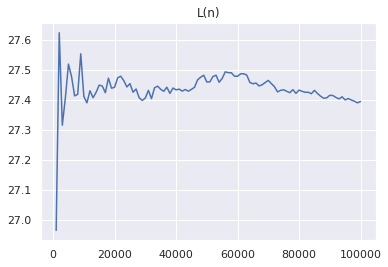

In [84]:
tmp = np.arange(1000, 100001, 1000)
L_size = []

for i in range(100):
  L_size.append(t.interval(0.95, len(indiv[:tmp[i]])-1, loc=np.mean(indiv[:tmp[i]]), scale = np.std(indiv[:tmp[i]], ddof = 1)))
L_size_ = []  
for i in L_size:  
  L_size_.append(i[1] - i[0])
plt.plot(tmp, L_size_)
plt.title("L(n)")
plt.show()

*4. Output scatterplot of function L(α), α=0.01, 0.02, …. 0.2 – length of confidence interval constructed using all information, α is a critical level.*

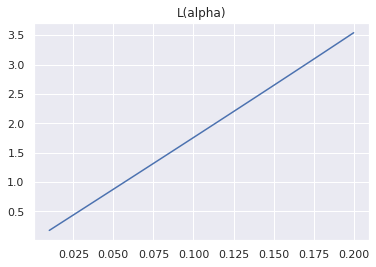

In [85]:
tmp = np.arange(0.01, 0.21, 0.01)
L_alpha=[]
for i in range(20):
  L_alpha.append(t.interval(tmp[i], size_-1, loc=mu, scale = s))
L_alpha_ = []  
for i in L_alpha:  
  L_alpha_.append(i[1] - i[0])
plt.plot(tmp, L_alpha_)
plt.title("L(alpha)")
plt.show()